In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from data_loader import *
from metadata import MetaData
import os
#from data_preprocessing import ElecPreprocessor

In [8]:
df = pd.read_csv('../../preprocessed_data/home259_sampledData.csv')
df['time'] = pd.to_datetime(df['time'])
df = df.sort_values(by = ['time'])
df = df.set_index('time', drop = True)

In [16]:
df

mains_apparent  microwave  mains_real  dishwasher  \
time                                                                     
2017-12-11 10:35:40      271.888889        NaN         NaN         NaN   
2017-12-11 10:35:50      306.000000        NaN         NaN         NaN   
2017-12-11 10:36:00      306.700000        NaN         NaN         NaN   
2017-12-11 10:36:10      306.100000        NaN         NaN         NaN   
2017-12-11 10:36:20      306.200000        NaN         NaN         NaN   
...                             ...        ...         ...         ...   
2018-06-30 23:59:10     8739.400000        NaN      9516.0         NaN   
2018-06-30 23:59:20     8656.500000        NaN      9516.0         NaN   
2018-06-30 23:59:30     8739.400000        NaN      9515.6         NaN   
2018-06-30 23:59:40     8654.800000        NaN      9512.0         NaN   
2018-06-30 23:59:50     8657.100000        NaN      9512.0         NaN   

                     kettle            diff  
time                                         
2017-12-11 10:35:40     NaN             NaT  
2017-12-11 10:35:50     NaN 0 days 00:00:10  
2017-12-11 10:36:00     NaN 0 days 00:00:10  
2017-12-11 10:36:10     NaN 0 days 00:00:10  
2017-12-11 10:36:20     NaN 0 days 00:00:10  
...                     ...             ...  
2018-06-30 23:59:10     NaN 0 days 00:00:10  
2018-06-30 23:59:20     NaN 0 days 00:00:10  
2018-06-30 23:59:30     NaN 0 days 00:00:10  
2018-06-30 23:59:40     NaN 0 days 00:00:10  
2018-06-30 23:59:50     NaN 0 days 00:00:10  

[1741466 rows x 6 columns]

In [64]:
import os
def append_row(df, row):
    return pd.concat([
                df, 
                pd.DataFrame([row], columns=row.index)]
           ).reset_index(drop=True)
directory = '../../preprocessed_data'
appliances = ['homeid', 'mains_apparent', 'mains_real', 'dishwasher', 'microwave', 'kettle']
statdf = pd.DataFrame(columns = appliances)
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    homename = filename.split('_')[0]
    statdf = append_row(statdf, pd.Series({'homeid': homename, 'mains_apparent': 0, 'mains_real': 0, 'dishwasher': 0, 'microwave': 0, 'kettle': 0}))
    if os.path.isfile(f):
        df = pd.read_csv(f)
        for app in list(df):
                statdf.loc[statdf.homeid == homename, app] = df[app].count()/(6*60*24)

In [65]:
statdf

homeid mains_apparent  mains_real  dishwasher   microwave      kettle  \
0   home105     356.148495   29.043981  308.671644  308.411921  305.505324   
1   home106     403.057292  369.621644           0  360.720718  369.861574   
2   home128     349.304745  285.590394           0  148.527546  196.176042   
3   home136     342.653588      281.25  252.212153   41.981134    2.676389   
4   home139     225.357986   18.348611  225.729977           0           0   
5   home140     191.536458  133.022685           0           0           0   
6   home145     289.613542   102.34838           0           0           0   
7   home146     335.065046           0           0  194.385301  200.587616   
8   home162     294.922569   37.313889           0           0  192.835417   
9   home168     263.622801           0           0  112.285069   56.608333   
10  home169     268.397685    53.49919  173.399537  179.131134           0   
11  home171      92.882407    6.609144           0   15.772685           0   
12  home175      291.19537  118.603472  198.481829   25.915394  226.621528   
13  home208     247.916782   69.479977           0           0   88.296991   
14  home212     216.371528  192.950347  174.099884           0           0   
15  home225     230.071759   37.486343           0           0           0   
16  home227     178.518866   67.360532           0   87.894097   80.796412   
17  home228     206.736921   49.209259           0  158.295833           0   
18  home231     187.662731           0   46.381481   83.366435   68.133912   
19  home238      220.81794   67.415972   67.384491   58.513079           0   
20  home242     208.853935  122.224769  118.288079   87.080556           0   
21  home249     190.171296  139.558218  135.948264  138.100347   38.416204   
22  home255     199.952778   73.028935   87.937269   95.267477           0   
23  home259     181.797222   24.281481   18.006597   23.955324   24.258449   
24  home262     189.439005   21.386458           0           0    1.425347   
25  home263     181.512037   87.559375   84.042708   58.199884           0   
26  home264      186.52963   94.473611   94.193634   93.715394   94.359144   
27  home266     145.289815   23.979051           0   47.718519           0   
28  home268     185.380208           0           0   54.158218   57.810417   
29  home276     137.347917           0           0   16.256713    7.904745   
30  home311     102.089352           0     8.71412           0    5.838542   
31  home328      82.285764    8.270255           0    4.405093    7.935301   
32   home61     342.302083   42.351736  308.566204  329.494907  254.715046   
33   home62     637.232407  560.162269  592.263194           0  577.151273   
34   home63     472.676157           0  147.637847  429.607755  365.122106   
35   home65     570.212269  381.599306  341.053241           0  341.778819   
36   home73     468.766667  263.970602           0           0  386.577083   
37   home90     426.439931  223.441088           0  409.155671  413.832407   
38   home96     348.423611   11.731597  141.504398  173.164583   28.448843   

          time  
0   373.903935  
1   427.048380  
2   373.586111  
3   362.931366  
4   248.000000  
5   248.267708  
6   355.658102  
7   354.644329  
8   320.654745  
9   332.672685  
10  330.475231  
11  262.023843  
12  313.674074  
13  267.487384  
14  262.555787  
15  249.544097  
16  247.667130  
17  246.631134  
18  233.184259  
19  240.434028  
20  228.621991  
21  229.416551  
22  219.341088  
23  201.558565  
24  208.568750  
25  206.625694  
26  206.391204  
27  205.472106  
28  204.614352  
29  154.210764  
30  110.373380  
31   88.451505  
32  377.767708  
33  673.598264  
34  610.443634  
35  598.401389  
36  555.934606  
37  506.514815  
38  487.564815

In [18]:
statdf.loc['Total #days', :] = statdf.sum()
statdf

C:\Users\Alex\AppData\Local\Temp\ipykernel_5532\3293480528.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  statdf.loc['Total #days', :] = statdf.sum()


homeid mains_apparent   mains_real   dishwasher    microwave  \
0            home105     356.148495    29.040162   305.527546   305.497801   
1            home106     403.057292   350.508796            0    356.99213   
2            home128     349.304745   285.075579            0    147.07963   
3            home136     342.653588   280.789468   248.724306          0.0   
4            home139     225.357986    18.346181   222.016551            0   
5            home140     191.536458   132.830903            0            0   
6            home145     289.613542   102.129514            0            0   
7            home146     335.065046     1.464468            0   190.905671   
8            home162     294.922569    37.240046            0          0.0   
9            home168     263.622801            0            0   111.234606   
10           home169     268.397685    53.359722   170.354514   176.246759   
11           home171      92.882407      6.60706            0    15.551736   
12           home175      291.19537   118.425347   195.405671       25.825   
13           home208     247.916782    65.790972            0            0   
14           home212     216.371528   188.480787    166.84537            0   
15           home225     230.071759         37.4            0            0   
16           home227     178.518866    66.584144            0    86.371644   
17           home228     206.736921    49.082755            0   154.574537   
18           home231     187.662731            0    45.426273    81.508681   
19           home238      220.81794    67.165509    66.460301    57.726042   
20           home242     208.853935   101.814815   115.653009    84.920486   
21           home249     190.171296   127.644792   122.306713   124.335648   
22           home255     199.952778    72.782407    86.805556    94.236921   
23           home259     181.797222    24.266782     17.93912    23.890046   
24           home262     189.439005    21.368171            0            0   
25           home263     181.512037    87.217361    82.276968    56.732986   
26           home264      186.52963    93.787037    92.900347    92.143519   
27           home266     145.289815    23.604745            0    46.131019   
28           home268     185.380208    73.800347            0    53.351968   
29           home276     137.347917    16.422801            0     15.73125   
30           home311     102.089352            0     8.690625            0   
31           home328      82.285764     8.228241            0     4.351736   
32            home61     342.302083    41.785417   279.930787   300.854051   
33            home62     637.232407   549.737384   587.152431            0   
34            home63     472.676157          0.0   147.014699   426.853241   
35            home65     570.212269            0   337.035532            0   
36            home73     468.766667   263.769907            0            0   
37            home90     426.439931   216.656597            0   392.029861   
38            home96     348.423611    11.729051   140.437037    170.78287   
Total #days      NaN   10487.556597  3663.937269  3477.903356  3634.859838   

                  kettle          time  
0             302.415856    373.903935  
1             365.917593    427.048380  
2             194.062153    373.586111  
3                    0.0    362.931366  
4                      0    248.000000  
5                      0    248.267708  
6                      0    355.658102  
7                    0.0    354.644329  
8                    0.0    320.654745  
9                    0.0    332.672685  
10                     0    330.475231  
11                     0    262.023843  
12                   0.0    313.674074  
13             86.428356    267.487384  
14                     0    262.555787  
15                     0    249.544097  
16             79.121065    247.667130  
17                     0    246.631134  
18             66.570486    233.1842

In [16]:
applianceMap = pd.DataFrame()
applianceMap['homeid'] = statdf['homeid']
applianceMap['kettle'] = (statdf['kettle']>0).astype(int)
applianceMap['microwave'] = (statdf['microwave']>0).astype(int)
applianceMap['dishwasher'] = (statdf['dishwasher']>0).astype(int)
applianceMap.to_csv('appliance_map_consumption.csv')

In [23]:
print(statdf.to_latex(columns = ['homeid', 'mains_apparent', 'mains_real'], index = False))

\begin{tabular}{lll}
\toprule
 homeid & mains\_apparent &   mains\_real \\
\midrule
home105 &     356.148495 &    29.040162 \\
home106 &     403.057292 &   350.508796 \\
home128 &     349.304745 &   285.075579 \\
home136 &     342.653588 &   280.789468 \\
home139 &     225.357986 &    18.346181 \\
home140 &     191.536458 &   132.830903 \\
home145 &     289.613542 &   102.129514 \\
home146 &     335.065046 &     1.464468 \\
home162 &     294.922569 &    37.240046 \\
home168 &     263.622801 &            0 \\
home169 &     268.397685 &    53.359722 \\
home171 &      92.882407 &      6.60706 \\
home175 &      291.19537 &   118.425347 \\
home208 &     247.916782 &    65.790972 \\
home212 &     216.371528 &   188.480787 \\
home225 &     230.071759 &         37.4 \\
home227 &     178.518866 &    66.584144 \\
home228 &     206.736921 &    49.082755 \\
home231 &     187.662731 &            0 \\
home238 &      220.81794 &    67.165509 \\
home242 &     208.853935 &   101.814815 \\
home249 &    

C:\Users\Alex\AppData\Local\Temp\ipykernel_5532\2444751409.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(statdf.to_latex(columns = ['homeid', 'mains_apparent', 'mains_real'], index = False))


In [31]:
import os
def append_row(df, row):
    return pd.concat([
                df, 
                pd.DataFrame([row], columns=row.index)]
           ).reset_index(drop=True)
def getStatsforAppliance(appliance):
    directory = '../../preprocessed_data'
    appliances = ['mains_apparent', 'mains_real']
    appliances.append(appliance)
    statdf = pd.DataFrame(columns = appliances)
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        homename = filename.split('_')[0]
        statdf = append_row(statdf, pd.Series({'homeid': homename, 'mains_apparent': 0, 'mains_real': 0, appliance : 0}))
        if os.path.isfile(f):
            df = pd.read_csv(f)
            if set(appliances).issubset(set(list(df))):
                df = df.loc[(df['mains_apparent'].notna()) & (df['mains_real'].notna()) & (df[appliance].notna()), :]
                for app in appliances:
                    statdf.loc[statdf.homeid == homename, app] = df[app].count()/(6*60*24)
    return statdf

In [154]:
appdf = pd.read_csv('appliance_map.csv')

In [155]:
appdf.drop(columns = ['Unnamed: 0'], inplace = True)

In [156]:
appdf[(appdf.kettle==1) & (appdf.microwave==1) & (appdf.dishwasher==1)]

homeid  kettle  microwave  dishwasher
1      259       1          1           1
4      136       1          1           1
5      264       1          1           1
17     175       1          1           1
19      61       1          1           1
21      63       1          1           1
28      96       1          1           1
32     231       1          1           1
33     105       1          1           1
36     242       1          1           1
37     249       1          1           1

In [7]:
tabledf = pd.DataFrame(columns = list(appdf))

In [9]:
for col in list(appdf):
    tabledf.loc['homes', col] = appdf[col].sum()
tabledf.drop(columns = ['homeid'], inplace = True)
tabledf

kettle microwave dishwasher
homes     27        28         20

In [32]:
def getHomesPerApplianceAndPower(typeOfPower, appliance):
    directory = '../../preprocessed_data'
    appliances = [typeOfPower, appliance]
    print(appliances)
    statdf = pd.DataFrame(columns = ['homeid'].extend(appliances))
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        homename = filename.split('_')[0]
        statdf = append_row(statdf, pd.Series({'homeid': homename, typeOfPower: 0, appliance: 0}))
        if os.path.isfile(f):
            df = pd.read_csv(f)
            if set(appliances).issubset(set(list(df))):
                df.set_index('time', inplace=True)
                df.index = pd.to_datetime(df.index)
                df = df.loc[(df[typeOfPower].notna()) & (df[appliance].notna()), :]
                for app in appliances:
                    statdf.loc[statdf.homeid == homename, app] = df[app].count()/(6*60*24)
    return statdf
def getHomesPerAppliance(appliance):
    directory = '../../preprocessed_data'
    appliances = ['mains_apparent', 'mains_real']+[appliance]
    print(appliances)
    statdf = pd.DataFrame(columns = ['homeid'].extend(appliances))
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        homename = filename.split('_')[0]
        statdf = append_row(statdf, pd.Series({'homeid': homename, 'mains_apparent': 0, 'mains_real': 0, appliance: 0}))
        if os.path.isfile(f):
            df = pd.read_csv(f)
            if set(appliances).issubset(set(list(df))):
                df.set_index('time', inplace=True)
                df.index = pd.to_datetime(df.index)
                df = df.loc[(df['mains_apparent'].notna()) & (df['mains_real'].notna()) & (df[appliance].notna()), :]
                for app in appliances:
                    statdf.loc[statdf.homeid == homename, app] = df[app].count()/(6*60*24)
    return statdf

In [33]:
kettleStatDF = getHomesPerAppliance('kettle')
microwaveStatDF = getHomesPerAppliance('microwave')
dishwasherStatDF = getHomesPerAppliance('dishwasher')

['mains_apparent', 'mains_real', 'kettle']
['mains_apparent', 'mains_real', 'microwave']
['mains_apparent', 'mains_real', 'dishwasher']


In [89]:
kettleStatDFApparent = getHomesPerApplianceAndPower('mains_apparent', 'kettle')
kettleStatDFReal = getHomesPerApplianceAndPower('mains_real', 'kettle')

['mains_apparent', 'kettle']
['mains_real', 'kettle']


In [90]:
microwaveStatDFApparent = getHomesPerApplianceAndPower('mains_apparent','microwave')
microwaveStatDFReal = getHomesPerApplianceAndPower('mains_real','microwave')

['mains_apparent', 'microwave']
['mains_real', 'microwave']


In [91]:
dishwasherStatDFApparent = getHomesPerApplianceAndPower('mains_apparent', 'dishwasher')
dishwasherStatDFReal = getHomesPerApplianceAndPower('mains_real', 'dishwasher')

['mains_apparent', 'dishwasher']
['mains_real', 'dishwasher']


In [85]:
microwaveStatDF[microwaveStatDF.microwave>0]

homeid  mains_apparent  mains_real   microwave
0   home105       22.809954   22.809954   22.809954
1   home106      357.008449  357.008449  357.008449
2   home128      141.002662  141.002662  141.002662
3   home136       41.915509   41.915509   41.915509
8   home169       45.951736   45.951736   45.951736
9   home171        3.123380    3.123380    3.123380
10  home175        3.465046    3.465046    3.465046
14  home227       32.528125   32.528125   32.528125
15  home228       48.184954   48.184954   48.184954
16  home238       57.720255   57.720255   57.720255
17  home242       75.171065   75.171065   75.171065
18  home249      124.377199  124.377199  124.377199
19  home255       72.037731   72.037731   72.037731
20  home259       23.883565   23.883565   23.883565
22  home263       27.670486   27.670486   27.670486
23  home264       92.125579   92.125579   92.125579
24  home266       23.133912   23.133912   23.133912
25  home328        4.353125    4.353125    4.353125
26   home61       42.344676   42.344676   42.344676
30   home90      203.076273  203.076273  203.076273
31   home96        0.041782    0.041782    0.041782

In [109]:
microwaveStatDF[microwaveStatDF.microwave>0]

homeid  mains_apparent  mains_real   microwave
1   home106      357.008449  357.008449  357.008449
30   home90      203.076273  203.076273  203.076273
2   home128      141.002662  141.002662  141.002662
18  home249      124.377199  124.377199  124.377199
23  home264       92.125579   92.125579   92.125579
17  home242       75.171065   75.171065   75.171065
19  home255       72.037731   72.037731   72.037731
16  home238       57.720255   57.720255   57.720255
15  home228       48.184954   48.184954   48.184954
8   home169       45.951736   45.951736   45.951736
26   home61       42.344676   42.344676   42.344676
3   home136       41.915509   41.915509   41.915509
14  home227       32.528125   32.528125   32.528125
22  home263       27.670486   27.670486   27.670486
20  home259       23.883565   23.883565   23.883565
24  home266       23.133912   23.133912   23.133912
0   home105       22.809954   22.809954   22.809954
25  home328        4.353125    4.353125    4.353125
10  home175        3.465046    3.465046    3.465046
9   home171        3.123380    3.123380    3.123380

In [108]:
dishwasherStatDF[dishwasherStatDF.dishwasher>0]

homeid  mains_apparent  mains_real  dishwasher
27   home62      556.780093  556.780093  556.780093
3   home136      234.842824  234.842824  234.842824
28   home65      227.363773  227.363773  227.363773
12  home212      166.909144  166.909144  166.909144
18  home249      122.350579  122.350579  122.350579
17  home242      105.815162  105.815162  105.815162
23  home264       92.879630   92.879630   92.879630
10  home175       77.733912   77.733912   77.733912
16  home238       66.463194   66.463194   66.463194
19  home255       65.111806   65.111806   65.111806
26   home61       42.344676   42.344676   42.344676
8   home169       36.978241   36.978241   36.978241
22  home263       33.981366   33.981366   33.981366
0   home105       22.765162   22.765162   22.765162
4   home139       18.285185   18.285185   18.285185
20  home259       17.931944   17.931944   17.931944
31   home96       10.553356   10.553356   10.553356

In [36]:
kettleStatDF[kettleStatDF.kettle>0]

homeid  mains_apparent  mains_real      kettle
0   home105       28.979630   28.979630   28.979630
1   home106      365.937963  365.937963  365.937963
2   home128      183.486227  183.486227  183.486227
3   home136        2.676273    2.676273    2.676273
8   home162       36.507755   36.507755   36.507755
12  home175      106.365741  106.365741  106.365741
13  home208       14.283912   14.283912   14.283912
16  home227       22.562037   22.562037   22.562037
21  home249       35.931713   35.931713   35.931713
23  home259       24.192361   24.192361   24.192361
24  home262        1.424421    1.424421    1.424421
26  home264       92.971065   92.971065   92.971065
31  home328        7.846875    7.846875    7.846875
32   home61       42.344560   42.344560   42.344560
33   home62      542.052662  542.052662  542.052662
35   home65      225.964699  225.964699  225.964699
36   home73      263.158912  263.158912  263.158912
37   home90      211.622569  211.622569  211.622569
38   home96        4.782292    4.782292    4.782292

In [119]:
kettleStatDFReal[kettleStatDFReal.kettle>1]

homeid  mains_real      kettle
0   home105   28.976620   28.976620
1   home106  347.539120  347.539120
2   home128  183.410764  183.410764
12  home208   13.961806   13.961806
15  home227   22.537153   22.537153
19  home249   35.863889   35.863889
21  home259   24.185995   24.185995
22  home262    1.423727    1.423727
24  home264   92.915625   92.915625
26  home268   56.962963   56.962963
27  home276    7.758796    7.758796
28  home328    7.841667    7.841667
29   home61   41.778704   41.778704
30   home62  532.102431  532.102431
32   home73  263.125000  263.125000
33   home90  211.287384  211.287384

In [120]:
microwaveStatDFApparent[microwaveStatDFApparent.microwave>0]

homeid  mains_apparent   microwave
0   home105      305.497801  305.497801
1   home106      356.992130  356.992130
2   home128      147.079630  147.079630
7   home146      190.905671  190.905671
9   home169      176.246759  176.246759
10  home171       15.551736   15.551736
11  home175       25.825000   25.825000
15  home227       86.371644   86.371644
16  home228      154.574537  154.574537
17  home238       57.726042   57.726042
18  home242       84.920486   84.920486
19  home249      124.335648  124.335648
20  home255       94.236921   94.236921
21  home259       23.890046   23.890046
23  home263       56.732986   56.732986
24  home264       92.143519   92.143519
25  home266       46.131019   46.131019
26  home268       53.351968   53.351968
27  home276       15.731250   15.731250
28  home328        4.351736    4.351736
29   home61      300.854051  300.854051
31   home63      426.853241  426.853241
33   home90      392.029861  392.029861
34   home96      170.782870  170.782870

In [121]:
microwaveStatDFReal[microwaveStatDFReal.microwave>0]

homeid  mains_real   microwave
0   home105   22.807176   22.807176
1   home106  338.640046  338.640046
2   home128  140.941782  140.941782
7   home146    1.460764    1.460764
9   home169   45.928241   45.928241
10  home171    3.123264    3.123264
11  home175    3.464005    3.464005
15  home227   32.505671   32.505671
16  home228   48.159028   48.159028
17  home238   57.691898   57.691898
18  home242   68.511458   68.511458
19  home249  124.146991  124.146991
20  home255   71.994444   71.994444
21  home259   23.877199   23.877199
23  home263   27.637731   27.637731
24  home264   92.069676   92.069676
25  home266   22.816088   22.816088
26  home268   53.323148   53.323148
27  home276   15.719444   15.719444
28  home328    4.351620    4.351620
29   home61   41.778819   41.778819
33   home90  202.749537  202.749537
34   home96    0.041782    0.041782

In [122]:
dishwasherStatDFApparent[dishwasherStatDFApparent.dishwasher>0]

homeid  mains_apparent  dishwasher
0   home105      305.527546  305.527546
3   home136      248.724306  248.724306
4   home139      222.016551  222.016551
9   home169      170.354514  170.354514
11  home175      195.405671  195.405671
13  home212      166.845370  166.845370
17  home238       66.460301   66.460301
18  home242      115.653009  115.653009
19  home249      122.306713  122.306713
20  home255       86.805556   86.805556
21  home259       17.939120   17.939120
23  home263       82.276968   82.276968
24  home264       92.900347   92.900347
29   home61      279.930787  279.930787
30   home62      587.152431  587.152431
31   home63      147.014699  147.014699
34   home96      140.437037  140.437037

In [123]:
dishwasherStatDFReal[dishwasherStatDFReal.dishwasher>0]

homeid  mains_real  dishwasher
0   home105   22.762384   22.762384
3   home136  234.725694  234.725694
4   home139   18.283565   18.283565
9   home169   36.956134   36.956134
11  home175   77.661921   77.661921
13  home212  166.688542  166.688542
17  home238   66.430208   66.430208
18  home242   96.457292   96.457292
19  home249  122.131366  122.131366
20  home255   65.071528   65.071528
21  home259   17.925579   17.925579
23  home263   33.942361   33.942361
24  home264   92.824190   92.824190
29   home61   41.778819   41.778819
30   home62  546.763310  546.763310
34   home96   10.551505   10.551505

In [37]:
s1 = kettleStatDF.kettle.sum()
s2 = kettleStatDFApparent.kettle.sum()
print(s2-s1)

NameError: name 'kettleStatDFApparent' is not defined

In [93]:
s1 = microwaveStatDF.microwave.sum()
s2 = microwaveStatDFApparent.microwave.sum()
print(s2-s1)

1317.048726851852


In [94]:
s1 = dishwasherStatDF.dishwasher.sum()
s2 = dishwasherStatDFApparent.dishwasher.sum()
print(s2-s1)

1339.601967592593


In [95]:
s1 = dishwasherStatDF.dishwasher.sum()
s2 = dishwasherStatDFReal.dishwasher.sum()
print(s2-s1)

17.575231481481524


In [96]:
s1 = microwaveStatDF.microwave.sum()
s2 = microwaveStatDFReal.microwave.sum()
print(s2-s1)

19.111921296296487


In [97]:
s1 = kettleStatDF.kettle.sum()
s2 = kettleStatDFReal.kettle.sum()
print(s2-s1)

9.245254629629471


In [38]:
kettleStatDF = kettleStatDF[kettleStatDF.kettle>=1].sort_values(by=['kettle'], ascending=False)

In [39]:
microwaveStatDF = microwaveStatDF[microwaveStatDF.microwave>=1].sort_values(by=['microwave'], ascending=False)

In [40]:
dishwasherStatDF = dishwasherStatDF[dishwasherStatDF.dishwasher>=1].sort_values(by=['dishwasher'], ascending=False)

In [110]:
microwaveStatDF.microwave.cumsum()

1      357.008449
30     560.084722
2      701.087384
18     825.464583
23     917.590162
17     992.761227
19    1064.798958
16    1122.519213
15    1170.704167
8     1216.655903
26    1259.000579
3     1300.916088
14    1333.444213
22    1361.114699
20    1384.998264
24    1408.132176
0     1430.942130
25    1435.295255
10    1438.760301
9     1441.883681
Name: microwave, dtype: float64

In [41]:
kettleStatDF.kettle.cumsum()

33     542.052662
1      907.990625
36    1171.149537
35    1397.114236
37    1608.736806
2     1792.223032
12    1898.588773
26    1991.559838
32    2033.904398
8     2070.412153
21    2106.343866
0     2135.323495
23    2159.515856
16    2182.077894
13    2196.361806
31    2204.208681
38    2208.990972
3     2211.667245
24    2213.091667
Name: kettle, dtype: float64

In [112]:
dishwasherStatDF.dishwasher.cumsum()

27     556.780093
3      791.622917
28    1018.986690
12    1185.895833
18    1308.246412
17    1414.061574
23    1506.941204
10    1584.675116
16    1651.138310
19    1716.250116
26    1758.594792
8     1795.573032
22    1829.554398
0     1852.319560
4     1870.604745
20    1888.536690
31    1899.090046
Name: dishwasher, dtype: float64

In [44]:
def getDatasetEqualPowerAmountsPerAppliance(statdf, appliance):
    directory = '../../preprocessed_data'
    saveDir = '../../preprocessed_data_equalPowerAmountsAnom/' + appliance
    homes = statdf.homeid.values
    for home in homes:
        filename = home + '_sampledData.csv'
        f = os.path.join(directory, filename)
        homename = filename.split('_')[0]
        if os.path.isfile(f):
            df = pd.read_csv(f)
            df.set_index('time', inplace=True)
            df.index = pd.to_datetime(df.index)
            print(df.head())
            df = df.loc[(df.mains_apparent.notna())&(df.mains_real.notna())&(df[appliance].notna()), :]
            df.loc[:, ['mains_apparent', 'mains_real', appliance]].to_csv(saveDir+'/'+filename)

In [45]:
getDatasetEqualPowerAmountsPerAppliance(kettleStatDF, 'kettle')
getDatasetEqualPowerAmountsPerAppliance(microwaveStatDF, 'microwave')
getDatasetEqualPowerAmountsPerAppliance(dishwasherStatDF, 'dishwasher')

                     mains_apparent  kettle  mains_real  dishwasher
time                                                               
2016-08-26 09:38:30           108.8     NaN         NaN         NaN
2016-08-26 09:38:40            74.8     NaN         NaN         NaN
2016-08-26 09:38:50            34.0     NaN         NaN         NaN
2016-08-26 09:39:00            93.0     NaN         NaN         NaN
2016-08-26 09:39:10            37.2     NaN         NaN         NaN
                     mains_apparent  microwave  mains_real  kettle
time                                                              
2017-04-13 10:26:00           212.7        NaN         NaN     NaN
2017-04-13 10:26:10           249.7        NaN         NaN     NaN
2017-04-13 10:26:20           250.0        NaN         NaN     NaN
2017-04-13 10:26:30           250.2        NaN         NaN     NaN
2017-04-13 10:26:40           250.0        NaN         NaN     NaN
                     mains_apparent  mains_real  kettle

                     mains_apparent  microwave  mains_real  dishwasher  kettle
time                                                                          
2017-06-28 12:34:20          320.75        NaN         NaN         NaN     NaN
2017-06-28 12:34:30          384.20        NaN         NaN         NaN     NaN
2017-06-28 12:34:40          327.50        NaN         NaN         NaN     NaN
2017-06-28 12:34:50          428.20        NaN         NaN         NaN     NaN
2017-06-28 12:35:00          427.80        NaN         NaN         NaN     NaN
                     mains_apparent  mains_real  kettle
time                                                   
2017-12-04 10:21:00         207.875         NaN     NaN
2017-12-04 10:21:10         236.500         NaN     NaN
2017-12-04 10:21:20         236.700         NaN     NaN
2017-12-04 10:21:30         237.100         NaN     NaN
2017-12-04 10:21:40         238.200         NaN     NaN
                     mains_apparent  microwave  mains_r

                     mains_apparent  microwave  mains_real
time                                                      
2017-12-07 12:40:10             0.0        NaN         NaN
2017-12-07 12:40:20            62.3        NaN         NaN
2017-12-07 12:40:30            91.7        NaN         NaN
2017-12-07 12:40:40            92.0        NaN         NaN
2017-12-07 12:40:50            91.8        NaN         NaN
                     mains_apparent  microwave  mains_real  dishwasher  kettle
time                                                                          
2017-04-25 13:25:00           152.9        NaN         NaN         NaN     NaN
2017-04-25 13:25:10           159.3        NaN         NaN         NaN     NaN
2017-04-25 13:25:20           138.0        NaN         NaN         NaN     NaN
2017-04-25 13:25:30           168.3        NaN         NaN         NaN     NaN
2017-04-25 13:25:40           142.5        NaN         NaN         NaN     NaN
                     mains_apparen

                     mains_apparent  microwave  mains_real  dishwasher
time                                                                  
2017-12-06 08:59:00      146.571429        NaN         NaN         NaN
2017-12-06 08:59:10      171.400000        NaN         NaN         NaN
2017-12-06 08:59:20      171.200000        NaN         NaN         NaN
2017-12-06 08:59:30      170.800000        NaN         NaN         NaN
2017-12-06 08:59:40      173.200000        NaN         NaN         NaN
                     mains_apparent  microwave  mains_real  dishwasher  kettle
time                                                                          
2017-04-25 13:25:00           152.9        NaN         NaN         NaN     NaN
2017-04-25 13:25:10           159.3        NaN         NaN         NaN     NaN
2017-04-25 13:25:20           138.0        NaN         NaN         NaN     NaN
2017-04-25 13:25:30           168.3        NaN         NaN         NaN     NaN
2017-04-25 13:25:40          

In [135]:
def getMonthsperHomeforAppliance(appliance):
    directory = '../../preprocessed_data_equalPowerAmountsKeepData/' + appliance
    yearMonths = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    statdf = pd.DataFrame(columns = ['homeid'].extend(yearMonths))
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        homename = filename.split('_')[0]
        statdf = append_row(statdf, pd.Series({'homeid': homename, 'January': False, 'February': False, 'March': False, 'April': False, 'May': False, 'June': False, 'July': False, 'August': False, 'September': False, 'October': False, 'November': False, 'December': False}))
        if os.path.isfile(f):
            df = pd.read_csv(f)
            df.set_index('time', inplace=True)
            df.index = pd.to_datetime(df.index)
            df = df.resample('M')[appliance].sum()
            months = df.index.month.values
            for month in months:
                statdf.loc[statdf.homeid == homename, yearMonths[month-1]] = True
    return statdf

In [136]:
kettleMonthDataAvailable = getMonthsperHomeforAppliance('kettle')

In [137]:
kettleMonthDataAvailable

homeid  January  February  March  April    May   June   July  August  \
0   home105     True      True   True   True   True   True   True    True   
1   home106     True      True   True   True   True   True   True    True   
2   home128     True      True   True   True   True   True  False    True   
3   home208     True      True   True   True   True   True  False   False   
4   home227     True      True   True   True   True   True  False   False   
5   home249     True      True   True   True   True   True  False   False   
6   home259    False     False  False  False  False   True  False   False   
7   home262    False      True   True  False  False  False  False   False   
8   home264    False     False   True   True   True   True  False   False   
9   home268    False     False  False   True   True   True  False   False   
10  home276    False     False  False  False   True  False  False   False   
11  home328    False     False  False  False   True  False  False   False   
12   home61    False     False  False   True   True   True  False   False   
13   home62     True      True   True   True   True   True   True    True   
14   home73    False      True   True   True   True   True   True    True   
15   home90     True      True   True   True   True   True   True    True   

    September  October  November  December  
0        True     True      True      True  
1        True     True      True      True  
2        True     True      True      True  
3       False    False     False     False  
4       False    False     False      True  
5       False    False     False     False  
6       False    False     False     False  
7       False    False     False     False  
8       False    False     False     False  
9       False    False     False     False  
10      False    False     False     False  
11      False    False     False     False  
12      False    False     False     False  
13       True     True      True      True  
14       True     True      True     False  
15       True     True      True      True

In [141]:
kettleStatDF

homeid  mains_apparent  mains_real      kettle
30   home62      532.102431  532.102431  532.102431
1   home106      347.539120  347.539120  347.539120
32   home73      263.125000  263.125000  263.125000
33   home90      211.287384  211.287384  211.287384
2   home128      183.410764  183.410764  183.410764
24  home264       92.915625   92.915625   92.915625
26  home268       56.962963   56.962963   56.962963
29   home61       41.778704   41.778704   41.778704
19  home249       35.863889   35.863889   35.863889
0   home105       28.976620   28.976620   28.976620
21  home259       24.185995   24.185995   24.185995
15  home227       22.537153   22.537153   22.537153
12  home208       13.961806   13.961806   13.961806
28  home328        7.841667    7.841667    7.841667
27  home276        7.758796    7.758796    7.758796
22  home262        1.423727    1.423727    1.423727

In [142]:
microwaveMonthDataAvailable = getMonthsperHomeforAppliance('microwave')

In [143]:
microwaveMonthDataAvailable

homeid  January  February  March  April    May   June   July  August  \
0   home105     True      True   True   True   True   True   True    True   
1   home106     True      True   True   True   True   True   True    True   
2   home128     True      True   True   True   True   True  False    True   
3   home146    False     False  False   True   True   True  False   False   
4   home169     True      True   True   True   True   True  False   False   
5   home171    False     False  False  False  False  False  False   False   
6   home175     True      True   True   True   True   True  False   False   
7   home227     True      True   True   True   True   True  False   False   
8   home228     True      True   True   True   True   True  False   False   
9   home238    False     False  False   True   True   True  False   False   
10  home242    False      True   True   True   True   True  False   False   
11  home249     True      True   True   True   True   True  False   False   
12  home255    False     False   True   True   True   True  False   False   
13  home259    False     False  False  False  False   True  False   False   
14  home263     True      True   True   True   True   True  False   False   
15  home264    False     False   True   True   True   True  False   False   
16  home266     True      True   True   True  False  False  False   False   
17  home268    False     False  False   True   True   True  False   False   
18  home276    False     False  False  False   True  False  False   False   
19  home328    False     False  False  False   True  False  False   False   
20   home61    False     False  False   True   True   True  False   False   
21   home90     True      True   True   True   True   True   True    True   

    September  October  November  December  
0        True     True      True      True  
1        True     True      True      True  
2        True     True      True      True  
3       False    False     False     False  
4       False     True      True      True  
5       False     True     False     False  
6       False     True      True      True  
7       False    False     False      True  
8       False    False     False      True  
9       False    False     False     False  
10      False    False     False     False  
11      False    False     False     False  
12      False    False     False     False  
13      False    False     False     False  
14      False    False     False     False  
15      False    False     False     False  
16      False    False     False     False  
17      False    False     False     False  
18      False    False     False     False  
19      False    False     False     False  
20      False    False     False     False  
21       True     True      True      True

In [144]:
microwaveStatDF

homeid  mains_apparent  mains_real   microwave
1   home106      338.640046  338.640046  338.640046
33   home90      202.749537  202.749537  202.749537
2   home128      140.941782  140.941782  140.941782
19  home249      124.146991  124.146991  124.146991
24  home264       92.069676   92.069676   92.069676
20  home255       71.994444   71.994444   71.994444
18  home242       68.511458   68.511458   68.511458
17  home238       57.691898   57.691898   57.691898
26  home268       53.323148   53.323148   53.323148
16  home228       48.159028   48.159028   48.159028
9   home169       45.928241   45.928241   45.928241
29   home61       41.778819   41.778819   41.778819
15  home227       32.505671   32.505671   32.505671
23  home263       27.637731   27.637731   27.637731
21  home259       23.877199   23.877199   23.877199
25  home266       22.816088   22.816088   22.816088
0   home105       22.807176   22.807176   22.807176
27  home276       15.719444   15.719444   15.719444
28  home328        4.351620    4.351620    4.351620
11  home175        3.464005    3.464005    3.464005
10  home171        3.123264    3.123264    3.123264
7   home146        1.460764    1.460764    1.460764

In [145]:
dishwasherMonthDataAvailable = getMonthsperHomeforAppliance('dishwasher')

In [146]:
dishwasherMonthDataAvailable

homeid  January  February  March  April    May   June   July  August  \
0   home105     True      True   True   True   True   True   True    True   
1   home136     True      True   True   True   True   True  False    True   
2   home139    False     False  False  False  False  False  False   False   
3   home169     True      True   True   True   True   True  False   False   
4   home175     True      True   True   True   True   True  False   False   
5   home212     True      True   True   True   True   True  False   False   
6   home238    False     False  False   True   True   True  False   False   
7   home242    False      True   True   True   True   True  False   False   
8   home249     True      True   True   True   True   True  False   False   
9   home255    False     False   True   True   True   True  False   False   
10  home259    False     False  False  False  False   True  False   False   
11  home263     True      True   True   True   True   True  False   False   
12  home264    False     False   True   True   True   True  False   False   
13   home61    False     False  False   True   True   True  False   False   
14   home62     True      True   True   True   True   True   True    True   
15   home96    False     False  False  False  False  False  False    True   

    September  October  November  December  
0        True     True      True      True  
1        True     True      True      True  
2       False     True      True     False  
3       False     True      True      True  
4       False     True      True      True  
5       False    False      True      True  
6       False    False     False     False  
7       False    False     False     False  
8       False    False     False     False  
9       False    False     False     False  
10      False    False     False     False  
11      False    False     False     False  
12      False    False     False     False  
13      False    False     False     False  
14       True     True      True      True  
15      False    False     False     False

In [147]:
dishwasherStatDF

homeid  mains_apparent  mains_real  dishwasher
30   home62      546.763310  546.763310  546.763310
3   home136      234.725694  234.725694  234.725694
13  home212      166.688542  166.688542  166.688542
19  home249      122.131366  122.131366  122.131366
18  home242       96.457292   96.457292   96.457292
24  home264       92.824190   92.824190   92.824190
11  home175       77.661921   77.661921   77.661921
17  home238       66.430208   66.430208   66.430208
20  home255       65.071528   65.071528   65.071528
29   home61       41.778819   41.778819   41.778819
9   home169       36.956134   36.956134   36.956134
23  home263       33.942361   33.942361   33.942361
0   home105       22.762384   22.762384   22.762384
4   home139       18.283565   18.283565   18.283565
21  home259       17.925579   17.925579   17.925579
34   home96       10.551505   10.551505   10.551505

In [46]:
def constructModelData(appliance):
    directory = '../../preprocessed_data_equalPowerAmountsAnom/' + appliance
    saveDir = '../../model_dataAnom/' + appliance + '/'
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        homename = filename.split('_')[0]
        if os.path.isfile(f):
            df = pd.read_csv(f)
            df.set_index('time', inplace=True)
            df.index = pd.to_datetime(df.index)
            typeOfPower = 'apparent'
            dfApp = df.loc[:, ['mains_apparent', appliance]]
            dfApp.rename(columns={"mains_apparent": "power", appliance: "appliance"}, inplace = True)
            dfApp.to_csv(saveDir+typeOfPower + '/' + filename)
            typeOfPower = 'real'
            dfReal = df.loc[:, ['mains_real', appliance]]
            dfReal.rename(columns={"mains_real": "power", appliance: "appliance"}, inplace = True)
            dfReal.to_csv(saveDir+typeOfPower + '/' + filename)

In [47]:
for appl in ['kettle', 'dishwasher', 'microwave']:
    constructModelData(appl)

In [62]:
direc = '../../model_dataAnom/kettle/apparent/'
sampleDF = pd.read_csv(direc + 'home259_sampledData.csv')
sampleDF.set_index('time', inplace=True)
sampleDF.index = pd.to_datetime(sampleDF.index)

In [63]:
sampleDF

power  appliance
time                                  
2018-06-05 07:42:10   507.8        NaN
2018-06-05 07:42:20   775.5        NaN
2018-06-05 07:43:00   584.8        NaN
2018-06-05 07:43:10   766.9        NaN
2018-06-05 07:45:50   341.9        NaN
...                     ...        ...
2018-06-30 22:56:00   340.9        0.0
2018-06-30 22:56:10   417.6        0.0
2018-06-30 23:25:40   240.0        0.0
2018-06-30 23:26:00   401.3        0.0
2018-06-30 23:28:10  8609.9        0.0

[61889 rows x 2 columns]

<AxesSubplot: xlabel='time'>

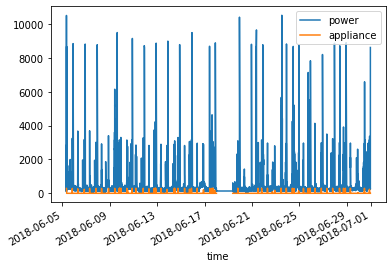

In [64]:
sampleDF.plot()

In [6]:
direc = '../../model_dataAnom/kettle/real/test/'
sampleDF = pd.read_csv(direc + 'home264_sampledData.csv')
sampleDF.set_index('time', inplace=True)
sampleDF.index = pd.to_datetime(sampleDF.index)

<AxesSubplot: xlabel='time'>

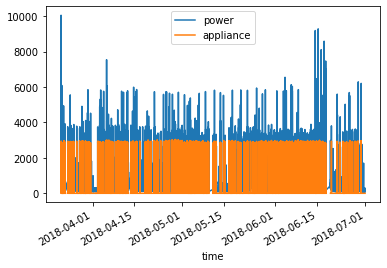

In [7]:
sampleDF.plot()

In [2]:
def constructModelDataLiterature(appliance):
    directory = '../../preprocessed_data'
    saveDir = '../../model_data_literatureComparison/' + appliance + '/'
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        homename = filename.split('_')[0]
        if os.path.isfile(f):
            df = pd.read_csv(f)
            if set(['mains_apparent', appliance]).issubset(set(list(df))):
                df.set_index('time', inplace=True)
                df.index = pd.to_datetime(df.index)
                typeOfPower = 'apparent'
                dfApp = df.loc[:, ['mains_apparent', appliance]]
                dfApp.rename(columns={"mains_apparent": "power", appliance: "appliance"}, inplace = True)
                dfApp.to_csv(saveDir+typeOfPower + '/' + filename)

In [3]:
for appl in ['kettle', 'dishwasher', 'microwave']:
    constructModelDataLiterature(appl)

In [25]:
def solveApparentRealPowerOrderKeepData():
    directory = '../../preprocessed_data'
    saveDir = '../../preprocessed_data_anomalySolvedUpscale'
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        homename = filename.split('_')[0]
        if os.path.isfile(f):
            df = pd.read_csv(f)
            if set(['mains_apparent', 'mains_real']).issubset(set(list(df))):
                df.set_index('time', inplace=True)
                df.index = pd.to_datetime(df.index)
                #print(df.count())
                df_diff = pd.Series(name='upscaler')
                smoother = 0.00001
                df['upscaler'] = df['mains_real']/df['mains_apparent']
                df = df.loc[df['upscaler']<=1.5, :]
                maxx = df['upscaler'].max()
                df['mains_apparent'] = df['mains_apparent'] * maxx
                df.drop(columns = ['upscaler'], inplace = True)
                df.to_csv(saveDir + '/' + filename)
                #print(df_diff[df_diff>1.0].count()/df_diff.count())

In [26]:
solveApparentRealPowerOrderKeepData()

C:\Users\Alex\AppData\Local\Temp\ipykernel_14140\50325073.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_diff = pd.Series(name='upscaler')
C:\Users\Alex\AppData\Local\Temp\ipykernel_14140\50325073.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_diff = pd.Series(name='upscaler')
C:\Users\Alex\AppData\Local\Temp\ipykernel_14140\50325073.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_diff = pd.Series(name='upscaler')
C:\Users\Alex\AppData\Local\Temp\ipykernel_14140\50325073.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to s

C:\Users\Alex\AppData\Local\Temp\ipykernel_14140\50325073.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_diff = pd.Series(name='upscaler')


In [8]:
direc = '../../preprocessed_data/'
sampleDF = pd.read_csv(direc+'home264_sampledData.csv')
sampleDF.set_index('time', inplace=True)
sampleDF.index = pd.to_datetime(sampleDF.index)

In [9]:
dishwasherDF = sampleDF.dropna(subset = ['dishwasher', 'microwave', 'kettle'])

<AxesSubplot: xlabel='time'>

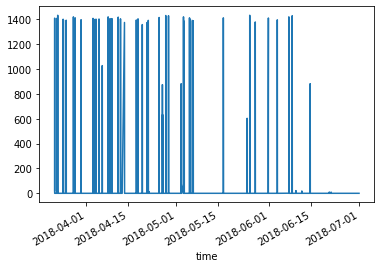

In [10]:
dishwasherDF.microwave.plot()

<AxesSubplot: xlabel='time'>

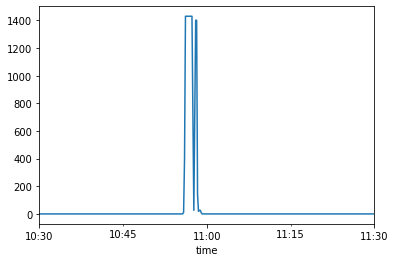

In [11]:
dishwasherDF['2018-04-28 10:30:00': '2018-04-28 11:30:00'].microwave.plot()

<AxesSubplot: xlabel='time'>

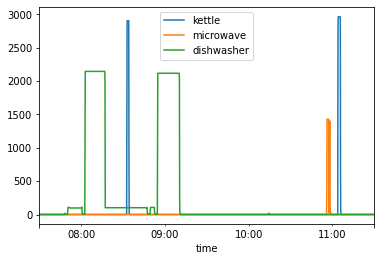

In [12]:
dishwasherDF.loc['2018-04-28 07:30:00': '2018-04-28 11:30:00', ['kettle', 'microwave', 'dishwasher']].plot()

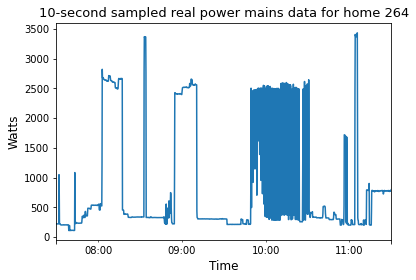

In [25]:
dishwasherDF['2018-04-28 07:30:00': '2018-04-28 11:30:00'].mains_real.plot()
plt.title('10-second sampled real power mains data for home 264', fontsize=13)
plt.ylabel('Watts', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.savefig('../plots/realSample.pdf')

In [2]:
import numpy as np
import pandas as pd
import os

def getMean(meanA, meanB, countA, countB):
    return ((countA * meanA) + (countB * meanB))/(countA+countB)

def getVar(varA, varB, meanA, meanB, countA, countB):
    return ((((countA - 1)*varA) + ((countB-1)*varB))/(countA+countB-1)) + ((countA * countB *(meanA-meanB)*(meanA-meanB))/((countA+countB)*(countA+countB-1)))

def getApplianceStats():
    ans = pd.DataFrame(columns = ['mean_on_power', 'std_on_power'])
    for typeOfPower in ['real', 'apparent']:
        getMains = True
        appliancePowerMean = 0
        applianceVar = 0
        applianceCount = 0
        for appliance in ['kettle', 'microwave', 'dishwasher']:
            meanPower = 0
            varPower = 0
            countPower = 0
            direc = '../../model_dataKeepData/' + appliance + '/' + typeOfPower + '/' + 'train'
            for filename in os.listdir(direc):
                f = os.path.join(direc, filename)
                df = pd.read_csv(f)
                df.set_index('time', inplace=True)
                df.index = pd.to_datetime(df.index)
                if getMains:
                    powerMean = df['power'].mean()
                    powerVar = df['power'].var()
                    varPower = getVar(varPower, powerVar, meanPower, powerMean, countPower, df['power'].count())
                    meanPower = getMean(meanPower, powerMean, countPower, df['power'].count())
                    countPower +=df['power'].count()
                applianceVar = getVar(applianceVar, df['appliance'].var(), appliancePowerMean, df['appliance'].mean(), applianceCount, df['appliance'].count())
                appliancePowerMean = getMean(appliancePowerMean, df['appliance'].mean(), applianceCount, df['appliance'].count())
                applianceCount+=df['appliance'].count() 
            if getMains:
                ans.loc[typeOfPower, 'mean_on_power'] = meanPower
                ans.loc[typeOfPower, 'std_on_power'] = np.sqrt(varPower)
                getMains = False
            ans.loc[appliance+'_'+typeOfPower, 'mean_on_power'] = appliancePowerMean
            ans.loc[appliance+'_'+typeOfPower, 'std_on_power'] = np.sqrt(applianceVar)
    ans.to_csv('appliance_stats.csv')

getApplianceStats()

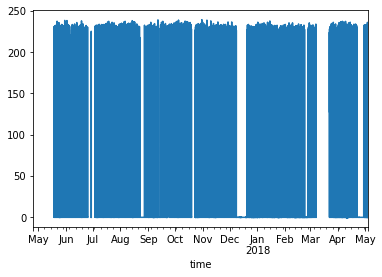

In [5]:
appliance = 'kettle'
typeOfPower = 'apparent'
direc = '../../preprocessed_data/'
for filename in os.listdir(direc):
    f = os.path.join(direc, filename)
    df = pd.read_csv(f)
    df.set_index('time', inplace=True)
    df.index = pd.to_datetime(df.index)
    df['kettle'].plot()
    break

In [6]:
direc = 'D:/MInf_data/metadata'
f = os.path.join(direc, 'home.csv')
df = pd.read_csv(f)
df

homeid install_type     location  residents         starttime  \
0        47     standard    Edinburgh          2  10/08/2016 00:00   
1        59     standard    Edinburgh          2  06/10/2016 00:00   
2        61     enhanced    Edinburgh          2  06/10/2016 00:00   
3        62     enhanced    Edinburgh          2  26/08/2016 00:00   
4        64     standard    Edinburgh          4  20/10/2016 00:00   
..      ...          ...          ...        ...               ...   
250     331     standard         Fife          2  12/04/2018 11:57   
251     332     standard    Edinburgh          1  19/04/2018 09:14   
252     334     standard    Edinburgh          5  30/04/2018 07:14   
253     335     standard  EastLothian          4  30/04/2018 13:42   
254     333     standard    Edinburgh          3  30/04/2018 07:27   

    starttime_enhanced           endtime            cohortid  \
0                  NaN  08/05/2017 09:00  treatment_20170315   
1                  NaN  28/01/2018 07:56    control_20170315   
2     17/11/2016 00:00  19/10/2017 07:00   enhanced_20170213   
3     11/10/2016 00:00  30/06/2018 22:59   enhanced_20170213   
4                  NaN  30/06/2018 22:59  treatment_20170315   
..                 ...               ...                 ...   
250                NaN  30/06/2018 22:59  treatment_20180514   
251                NaN  30/06/2018 22:59  treatment_20180514   
252                NaN  30/06/2018 22:59    control_20180514   
253                NaN  30/06/2018 22:59  treatment_20180514   
254                NaN  30/06/2018 22:59    control_20180514   

            income_band study_class  ...   urban_rural_name    build_era  \
0               Missing   treatment  ...  Large Urban Areas    1900-1918   
1       £90,000 or more     control  ...  Large Urban Areas    1900-1918   
2    £48,600 to £53,999    enhanced  ...  Large Urban Areas    1919-1930   
3    £43,200 to £48,599    enhanced  ...  Large Urban Areas    1850-1899   
4    £66,000 to £77,999   treatment  ...  Large Urban Areas  Before 1850   
..                  ...         ...  ...                ...          ...   
250  £54,000 to £65,999   treatment  ...  Other Urban Areas    1965-1980   
251  £32,400 to £37,799   treatment  ...  Large Urban Areas    1919-1930   
252   less than £10,800     control  ...  Large Urban Areas    1850-1899   
253  £78,000 to £89,999   treatment  ...  Other Urban Areas    1991-1995   
254  £54,000 to £65,999     control  ...  Large Urban Areas  Before 1850   

    new_build_year smart_monitors smart_automation occupied_days  \
0              NaN      Don't own        Don't own             2   
1              NaN      Don't own        Don't own             3   
2              NaN      Don't own        Don't own             2   
3              NaN      Don't own        Don't own             1   
4              NaN      Don't own        Don't own             6   
..             ...            ...              ...           ...   
250            NaN      Don't own        Don't own             7   
251            NaN      Don't own        Don't own             2   
252            NaN      Don't own        Don't own             4   
253            NaN      Don't own        Don't own             2   
254            NaN      Don't own        Don't own             2   

     occupied_nights entry_floor                 outdoor_space  outdoor_drying  
0                  7         3rd                            No             NaN  
1                  7      Ground  Yes - shared with neighbours             Yes  
2                  7      Ground  Yes - shared with neighbours             Yes  
3                  7         2nd  Yes - shared with neighbours             Yes  
4                  7         1st  Yes - shared with neighbours             Yes  
..               ...         ...                           ...             ...  
250                7      Ground                 Yes - private             Yes  
251              

In [8]:
homes = df[df.install_type=='enhanced'].homeid.values
homes

array([ 61,  62,  63,  65,  73,  90,  96, 106, 105, 136, 128, 139, 140,
       145, 146, 168, 169, 171, 162, 175, 208, 212, 225, 228, 227, 231,
       238, 242, 249, 255, 262, 264, 263, 266, 268, 259, 276, 311, 328],
      dtype=int64)

In [11]:
appliance = ['kettle']
subtype = ['mains']
subtype.extend(appliance)

In [12]:
print(subtype)

['mains', 'kettle']


In [199]:
direc = '../../model_dataAnom/kettle/real'
allDfReal = pd.DataFrame() 
for filename in os.listdir(direc):
    f = os.path.join(direc, filename)
    df = pd.read_csv(f)
    allDfReal = allDfReal.append(df)

C:\Users\Alex\AppData\Local\Temp\ipykernel_4188\3067718678.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allDfReal = allDfReal.append(df)
C:\Users\Alex\AppData\Local\Temp\ipykernel_4188\3067718678.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allDfReal = allDfReal.append(df)
C:\Users\Alex\AppData\Local\Temp\ipykernel_4188\3067718678.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allDfReal = allDfReal.append(df)
C:\Users\Alex\AppData\Local\Temp\ipykernel_4188\3067718678.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allDfReal = allDfReal.append(df)
C:\Users\Alex\AppData\Local\Temp\ipykernel_4188\3067718678.py:6: Fut

In [200]:
dfcount = allDfReal.power.value_counts()
dfcount

44.0      126128
43.0      124055
33.0      114703
32.0      112910
34.0       99776
           ...  
6865.7         1
6855.5         1
6714.2         1
5125.7         1
5069.8         1
Name: power, Length: 71139, dtype: int64

(0.0, 20.0)

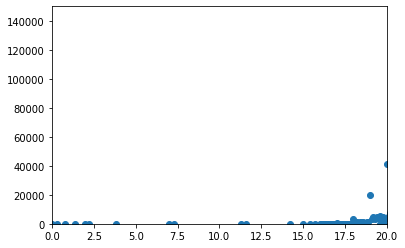

In [232]:
dfcount = dfcount.sort_index()
plt.scatter(dfcount.index, dfcount)
plt.ylim(0,150000)
plt.xlim(0, 20)

In [35]:
df[df.mains_real.notna()].count()/(6*60*24)

microwave         42.345139
dishwasher        42.345139
mains_apparent    42.351273
kettle            42.345023
mains_real        42.351736
dtype: float64

In [208]:
dfcountApp = allDfApparent.power.value_counts()
dfcountApp

34.0      348972
53.0      290581
75.0      241555
82.0      202158
80.0      170872
           ...  
6115.6         1
5996.4         1
5983.8         1
6655.9         1
6459.8         1
Name: power, Length: 75965, dtype: int64

(0.0, 40.0)

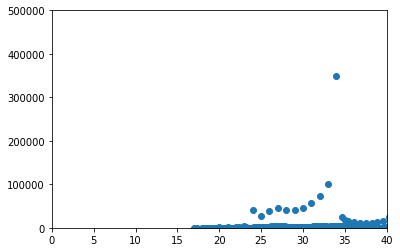

In [235]:
plt.scatter(dfcountApp.index, dfcountApp)
plt.ylim(0,500000)
plt.xlim(0, 40)

In [237]:
allDfReal[allDfReal.power>25].power.mean()

288.0616289819317

In [240]:
allDfApparent[allDfApparent.power>100].power.std()

763.1414828329631

In [246]:
kettleHomes = set(kettleStatDF.homeid.values)
microwaveHomes = set(microwaveStatDF.homeid.values)
dishwasherHomes = set(dishwasherStatDF.homeid.values)
ans = kettleHomes.intersection(microwaveHomes)
ans = ans.intersection(dishwasherHomes)
list(ans)

['home249', 'home175', 'home264', 'home136', 'home105', 'home61', 'home259']

In [248]:
kettleStatDF[kettleStatDF.homeid.isin(list(ans))]

homeid  mains_apparent  mains_real      kettle
10  home175      106.365741  106.365741  106.365741
23  home264       92.971065   92.971065   92.971065
26   home61       42.344560   42.344560   42.344560
18  home249       35.931713   35.931713   35.931713
0   home105       28.979630   28.979630   28.979630
20  home259       24.192361   24.192361   24.192361
3   home136        2.676273    2.676273    2.676273

In [249]:
microwaveStatDF[microwaveStatDF.homeid.isin(list(ans))]

homeid  mains_apparent  mains_real   microwave
18  home249      124.377199  124.377199  124.377199
23  home264       92.125579   92.125579   92.125579
26   home61       42.344676   42.344676   42.344676
3   home136       41.915509   41.915509   41.915509
20  home259       23.883565   23.883565   23.883565
0   home105       22.809954   22.809954   22.809954
10  home175        3.465046    3.465046    3.465046

In [250]:
dishwasherStatDF[dishwasherStatDF.homeid.isin(list(ans))]

homeid  mains_apparent  mains_real  dishwasher
3   home136      234.842824  234.842824  234.842824
18  home249      122.350579  122.350579  122.350579
23  home264       92.879630   92.879630   92.879630
10  home175       77.733912   77.733912   77.733912
26   home61       42.344676   42.344676   42.344676
0   home105       22.765162   22.765162   22.765162
20  home259       17.931944   17.931944   17.931944

In [5]:
statssss = pd.read_csv('appliance_stats.csv')

In [10]:
statssss[statssss['Unnamed: 0']=='kettle', :]

InvalidIndexError: (0    False
1     True
2    False
3    False
4    False
Name: Unnamed: 0, dtype: bool, slice(None, None, None))

In [11]:
statssss.columns

Index(['Unnamed: 0', 'mean_on_power', 'std_on_power'], dtype='object')

In [15]:
statssss[statssss['Unnamed: 0']=='kettle'].mean_on_power

1    2658.397209
Name: mean_on_power, dtype: float64

In [4]:
directory = '../../preprocessed_data'
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    homename = filename.split('_')[0]
    if os.path.isfile(f):
        df = pd.read_csv(f)
        if set(['mains_apparent', 'mains_real']).issubset(set(list(df))):
            df.set_index('time', inplace=True)
            df.index = pd.to_datetime(df.index)
            print(df[df.mains_apparent>20000].count())

mains_apparent    0
microwave         0
mains_real        0
dishwasher        0
kettle            0
dtype: int64
mains_apparent    0
microwave         0
mains_real        0
kettle            0
dtype: int64
mains_apparent    0
microwave         0
mains_real        0
kettle            0
dtype: int64
mains_apparent    0
microwave         0
mains_real        0
dishwasher        0
kettle            0
dtype: int64
mains_apparent    0
mains_real        0
dishwasher        0
dtype: int64
mains_apparent    0
mains_real        0
dtype: int64
mains_apparent    0
mains_real        0
dtype: int64
mains_apparent    0
mains_real        0
kettle            0
dtype: int64
mains_apparent    0
microwave         0
mains_real        0
dishwasher        0
dtype: int64
mains_apparent    0
microwave         0
mains_real        0
dtype: int64
mains_apparent    0
microwave         0
mains_real        0
dishwasher        0
kettle            0
dtype: int64
mains_apparent    0
mains_real        0
kettle           

In [5]:
from activationDetector import ActivationDetector
rules_file = 'gt_rules.json'
for appliance in ['kettle', 'microwave', 'dishwasher']:
    activation_detector = ActivationDetector(appliance, rulesfile=rules_file, sample_rate=10)
    print(appliance)
    for home_set in ['train', 'dev', 'test']:
        print(home_set)
        direc = '../../model_dataAnom/' + appliance + '/' + 'apparent' + '/' + home_set
        counter = 0
        for filename in os.listdir(direc):
            f = os.path.join(direc, filename)
            if os.path.isfile(f):
                readings = pd.read_csv(f)
                readings.set_index('time', inplace=True)
                readings.index = pd.to_datetime(readings.index)
                readings = readings.sort_index()
                activations = activation_detector.get_activations(readings.appliance)
                counter+=activations.count()
        print(counter)

kettle
train


D:\Universitate\Anul 5\MInf2\implementation\preprocessing\electric.py:124: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  longOns = longOns.append(pd.DataFrame(onsList, columns=eventDF.columns)).reset_index()
D:\Universitate\Anul 5\MInf2\implementation\preprocessing\electric.py:124: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  longOns = longOns.append(pd.DataFrame(onsList, columns=eventDF.columns)).reset_index()
D:\Universitate\Anul 5\MInf2\implementation\preprocessing\electric.py:124: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  longOns = longOns.append(pd.DataFrame(onsList, columns=eventDF.columns)).reset_index()
D:\Universitate\Anul 5\MInf2\implementation\preprocessing\electric.py:124: FutureWarning: The frame.append me

start     4592
end       4592
energy    4592
dtype: int64
dev


D:\Universitate\Anul 5\MInf2\implementation\preprocessing\electric.py:124: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  longOns = longOns.append(pd.DataFrame(onsList, columns=eventDF.columns)).reset_index()
D:\Universitate\Anul 5\MInf2\implementation\preprocessing\electric.py:124: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  longOns = longOns.append(pd.DataFrame(onsList, columns=eventDF.columns)).reset_index()
D:\Universitate\Anul 5\MInf2\implementation\preprocessing\electric.py:124: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  longOns = longOns.append(pd.DataFrame(onsList, columns=eventDF.columns)).reset_index()
D:\Universitate\Anul 5\MInf2\implementation\preprocessing\electric.py:124: FutureWarning: The frame.append me

start     901
end       901
energy    901
dtype: int64
test


D:\Universitate\Anul 5\MInf2\implementation\preprocessing\electric.py:124: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  longOns = longOns.append(pd.DataFrame(onsList, columns=eventDF.columns)).reset_index()
D:\Universitate\Anul 5\MInf2\implementation\preprocessing\electric.py:124: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  longOns = longOns.append(pd.DataFrame(onsList, columns=eventDF.columns)).reset_index()
D:\Universitate\Anul 5\MInf2\implementation\preprocessing\electric.py:124: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  longOns = longOns.append(pd.DataFrame(onsList, columns=eventDF.columns)).reset_index()
D:\Universitate\Anul 5\MInf2\implementation\preprocessing\electric.py:124: FutureWarning: The frame.append me

start     1373
end       1373
energy    1373
dtype: int64
microwave
train


D:\Universitate\Anul 5\MInf2\implementation\preprocessing\electric.py:124: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  longOns = longOns.append(pd.DataFrame(onsList, columns=eventDF.columns)).reset_index()
D:\Universitate\Anul 5\MInf2\implementation\preprocessing\electric.py:124: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  longOns = longOns.append(pd.DataFrame(onsList, columns=eventDF.columns)).reset_index()
D:\Universitate\Anul 5\MInf2\implementation\preprocessing\electric.py:124: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  longOns = longOns.append(pd.DataFrame(onsList, columns=eventDF.columns)).reset_index()
D:\Universitate\Anul 5\MInf2\implementation\preprocessing\electric.py:124: FutureWarning: The frame.append me

start     1575
end       1575
energy    1575
dtype: int64
dev


D:\Universitate\Anul 5\MInf2\implementation\preprocessing\electric.py:124: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  longOns = longOns.append(pd.DataFrame(onsList, columns=eventDF.columns)).reset_index()
D:\Universitate\Anul 5\MInf2\implementation\preprocessing\electric.py:124: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  longOns = longOns.append(pd.DataFrame(onsList, columns=eventDF.columns)).reset_index()
D:\Universitate\Anul 5\MInf2\implementation\preprocessing\electric.py:124: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  longOns = longOns.append(pd.DataFrame(onsList, columns=eventDF.columns)).reset_index()
D:\Universitate\Anul 5\MInf2\implementation\preprocessing\electric.py:124: FutureWarning: The frame.append me

start     360
end       360
energy    360
dtype: int64
test


D:\Universitate\Anul 5\MInf2\implementation\preprocessing\electric.py:124: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  longOns = longOns.append(pd.DataFrame(onsList, columns=eventDF.columns)).reset_index()
D:\Universitate\Anul 5\MInf2\implementation\preprocessing\electric.py:124: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  longOns = longOns.append(pd.DataFrame(onsList, columns=eventDF.columns)).reset_index()
D:\Universitate\Anul 5\MInf2\implementation\preprocessing\electric.py:124: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  longOns = longOns.append(pd.DataFrame(onsList, columns=eventDF.columns)).reset_index()
D:\Universitate\Anul 5\MInf2\implementation\preprocessing\electric.py:124: FutureWarning: The frame.append me

start     195
end       195
energy    195
dtype: int64
dishwasher
train


D:\Universitate\Anul 5\MInf2\implementation\preprocessing\electric.py:124: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  longOns = longOns.append(pd.DataFrame(onsList, columns=eventDF.columns)).reset_index()
D:\Universitate\Anul 5\MInf2\implementation\preprocessing\electric.py:124: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  longOns = longOns.append(pd.DataFrame(onsList, columns=eventDF.columns)).reset_index()
D:\Universitate\Anul 5\MInf2\implementation\preprocessing\electric.py:124: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  longOns = longOns.append(pd.DataFrame(onsList, columns=eventDF.columns)).reset_index()
D:\Universitate\Anul 5\MInf2\implementation\preprocessing\electric.py:124: FutureWarning: The frame.append me

start     825
end       825
energy    825
dtype: int64
dev


D:\Universitate\Anul 5\MInf2\implementation\preprocessing\electric.py:124: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  longOns = longOns.append(pd.DataFrame(onsList, columns=eventDF.columns)).reset_index()
D:\Universitate\Anul 5\MInf2\implementation\preprocessing\electric.py:124: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  longOns = longOns.append(pd.DataFrame(onsList, columns=eventDF.columns)).reset_index()
D:\Universitate\Anul 5\MInf2\implementation\preprocessing\electric.py:124: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  longOns = longOns.append(pd.DataFrame(onsList, columns=eventDF.columns)).reset_index()
D:\Universitate\Anul 5\MInf2\implementation\preprocessing\electric.py:124: FutureWarning: The frame.append me

start     84
end       84
energy    84
dtype: int64
test


D:\Universitate\Anul 5\MInf2\implementation\preprocessing\electric.py:124: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  longOns = longOns.append(pd.DataFrame(onsList, columns=eventDF.columns)).reset_index()
D:\Universitate\Anul 5\MInf2\implementation\preprocessing\electric.py:124: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  longOns = longOns.append(pd.DataFrame(onsList, columns=eventDF.columns)).reset_index()
D:\Universitate\Anul 5\MInf2\implementation\preprocessing\electric.py:124: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  longOns = longOns.append(pd.DataFrame(onsList, columns=eventDF.columns)).reset_index()


start     101
end       101
energy    101
dtype: int64


D:\Universitate\Anul 5\MInf2\implementation\preprocessing\electric.py:124: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  longOns = longOns.append(pd.DataFrame(onsList, columns=eventDF.columns)).reset_index()
